# Comparison of proton and Helium spectrum as function of energy and energy per nucleon

In [1]:
from pylab import *

### Proton spectrum data

In [2]:
# Proton data by IceTop
data_ICECUBE_H = np.genfromtxt("Fitting/Data/Proton/ICECUBE_H_data.txt")
E_ICECUBE_H = data_ICECUBE_H[:,1]
flux_ICECUBE_H = data_ICECUBE_H[:,3]
error_ICECUBE_stat_low_H = data_ICECUBE_H[:,4]
error_ICECUBE_stat_up_H = data_ICECUBE_H[:,5]
error_ICECUBE_syst_low_H = data_ICECUBE_H[:,6]
error_ICECUBE_syst_up_H = data_ICECUBE_H[:,7]
error_ICECUBE_low_H = np.sqrt(error_ICECUBE_stat_low_H**2 + error_ICECUBE_syst_low_H**2)
error_ICECUBE_up_H = np.sqrt(error_ICECUBE_stat_up_H**2 + error_ICECUBE_syst_up_H**2)

# Make proton data of IceTop compatible with helium data
E_ICECUBE_H = np.delete(E_ICECUBE_H, 16)
flux_ICECUBE_H = np.delete(flux_ICECUBE_H, 16)
error_ICECUBE_low_H = np.delete(error_ICECUBE_low_H, 16)
error_ICECUBE_up_H = np.delete(error_ICECUBE_up_H, 16)

# Proton data by KASCADE
data_KASCADE_H = np.genfromtxt("Fitting/Data/Proton/KASCADE_H_data_QGSJet2.txt")
E_KASCADE_H = (data_KASCADE_H[:,0] / 1e9)
flux_KASCADE_H = (data_KASCADE_H[:,1] * 1e9) 
error_KASCADE_H_low = (data_KASCADE_H[:,2] * 1e9) 
error_KASCADE_H_up = (data_KASCADE_H[:,3]* 1e9) 

In [3]:
# Helium data by IceTop
data_ICECUBE_He = np.genfromtxt("Fitting/Data/Helium/ICECUBE_He_data.txt")
E_ICECUBE_He = data_ICECUBE_He[:,1]
flux_ICECUBE_He = data_ICECUBE_He[:,3]
error_ICECUBE_stat_low_He = data_ICECUBE_He[:,4]
error_ICECUBE_stat_up_He = data_ICECUBE_He[:,5]
error_ICECUBE_syst_low_He = data_ICECUBE_He[:,6]
error_ICECUBE_syst_up_He = data_ICECUBE_He[:,7]
error_ICECUBE_low_He = np.sqrt(error_ICECUBE_stat_low_He**2 + error_ICECUBE_syst_low_He**2)
error_ICECUBE_up_He = np.sqrt(error_ICECUBE_stat_up_He**2 + error_ICECUBE_syst_up_He**2)

# Helium data by KASCADE
data_KASCADE_He = np.genfromtxt("Fitting/Data/Helium/KASCADE_He_data_QGSJet2.txt")
E_KASCADE_He = (data_KASCADE_He[:,0] / 1e9)
flux_KASCADE_He = (data_KASCADE_He[:,1] * 1e9) 
error_KASCADE_He_low = (data_KASCADE_He[:,2] * 1e9) 
error_KASCADE_He_up = (data_KASCADE_He[:,3]* 1e9) 

In [4]:
# Proton + helium data by IceTop (manual)
E_ICECUBE_H_He = E_ICECUBE_H
flux_ICECUBE_H_He = flux_ICECUBE_H + flux_ICECUBE_He
error_ICECUBE_low_H_He = error_ICECUBE_low_H + error_ICECUBE_low_He
error_ICECUBE_up_H_He = error_ICECUBE_up_H + error_ICECUBE_up_He

# Proton + helium data by KASCADE
data_KASCADE_H_He = np.genfromtxt("Fitting/Data/KASCADE_H_He_data.txt")
E_KASCADE_H_He = data_KASCADE_H_He[:,1]
flux_KASCADE_H_He = data_KASCADE_H_He[:,3] 
error_KASCADE_stat_H_He = data_KASCADE_H_He[:,4]
error_KASCADE_syst_H_He = data_KASCADE_H_He[:,5]
error_KASCADE_H_He = np.sqrt(error_KASCADE_stat_H_He**2 + error_KASCADE_syst_H_He**2)

In [5]:
# Model for proton
def Phi_proton(E):
    K = 0.0447834 
    E0 = 0.1
    alpha1 = 2.805; alpha2 = 2.56; alpha3 = 2.805; alpha4 = 0.647; alpha5 = 4.363
    omega1 = 0.28; omega2 = 0.163; omega3 = 0.976; omega4 = 1.449
    Eb1 = 0.670; Eb2 = 16; Eb3 = 0.687; Eb4 = 3.874
    delta1 = alpha2 - alpha1
    delta2 = alpha3 - alpha2
    delta3 = alpha4 - alpha3
    delta4 = alpha5 - alpha4
    phi = K * ((E/1e3) / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)
    return phi

# Model for He
def Phi_He(E):
    K = 0.0332401 
    E0 = 0.1
    alpha1 = 2.715; alpha2 = 2.474; alpha3 = 2.734; alpha4 = 2.04; alpha5 = 4.477
    omega1 = 0.28; omega2 = 0.011; omega3 = 0.1; omega4 = 0.934
    Eb1 = 1.204; Eb2 = 32.021; Eb3 = 0.61; Eb4 = 6.262
    delta1 = alpha2 - alpha1
    delta2 = alpha3 - alpha2
    delta3 = alpha4 - alpha3
    delta4 = alpha5 - alpha4
    phi = K * ((E/1e3) / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)
    return phi

logE = np.arange(2,9,0.1)
E = 10**logE
phi_proton = Phi_proton(E)
phi_He = Phi_He(E)
phi_total = phi_proton + phi_He

/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_21288/941924790.py:26: RuntimeWarning: overflow encountered in power
  phi = K * ((E/1e3) / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)


## Spectrum comparison

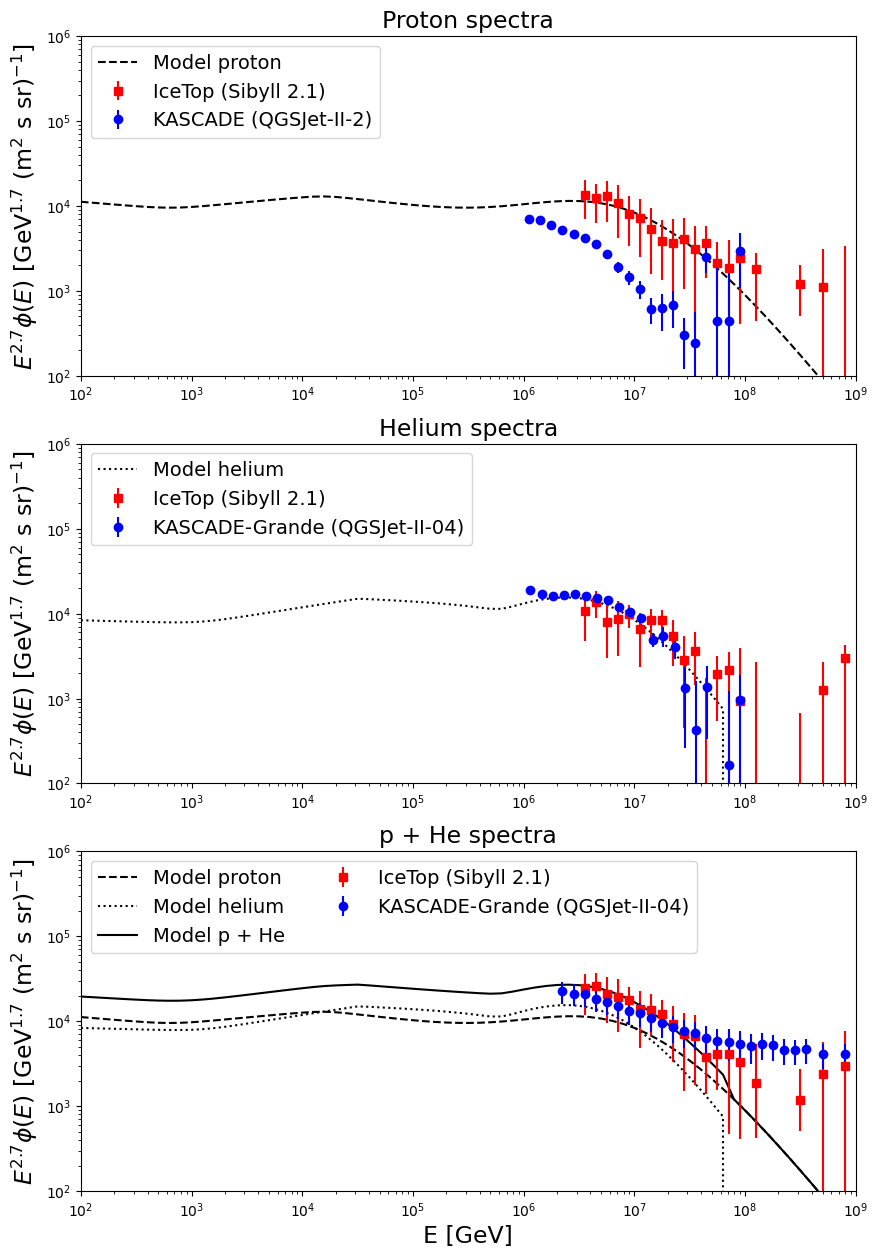

In [6]:
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
#
ax[0].plot(E, phi_proton * E**2.7, '--', color='black', label=r'Model proton')
ax[0].errorbar(E_ICECUBE_H, flux_ICECUBE_H * E_ICECUBE_H**2.7, yerr=(error_ICECUBE_low_H, error_ICECUBE_up_H) * E_ICECUBE_H**2.7, fmt='s', color='red', label='IceTop (Sibyll 2.1)')
ax[0].errorbar(E_KASCADE_H, flux_KASCADE_H * E_KASCADE_H**2.7, yerr=(error_KASCADE_H_low, error_KASCADE_H_up)  * E_KASCADE_H**2.7, fmt='o', color='blue', label='KASCADE (QGSJet-II-2)')
ax[0].loglog()
ax[0].set_xlim(1e2, 1e9)
ax[0].set_ylim(1e2, 1e6)
#ax[0].set_xlabel('E [GeV]', fontsize=17)
ax[0].set_ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (m$^2$ s sr)$^{-1}$]', fontsize=17)
ax[0].legend(ncol=1, fontsize=14, loc='upper left')
ax[0].set_title('Proton spectra', fontsize=17)
#
ax[1].plot(E, phi_He * E**2.7, ':', color='black', label=r'Model helium')
ax[1].errorbar(E_ICECUBE_He, flux_ICECUBE_He * E_ICECUBE_He**2.7, yerr=(error_ICECUBE_low_He, error_ICECUBE_up_He) * E_ICECUBE_He**2.7, fmt='s', color='red', label='IceTop (Sibyll 2.1)')
ax[1].errorbar(E_KASCADE_He, flux_KASCADE_He * E_KASCADE_He**2.7, yerr=(error_KASCADE_He_low, error_KASCADE_He_up)  * E_KASCADE_He**2.7, fmt='o', color='blue', label='KASCADE-Grande (QGSJet-II-04)')
ax[1].loglog()
ax[1].set_xlim(1e2, 1e9)
ax[1].set_ylim(1e2, 1e6)
#ax[1].set_xlabel('E [GeV]', fontsize=17)
ax[1].set_ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (m$^2$ s sr)$^{-1}$]', fontsize=17)
ax[1].legend(ncol=1, fontsize=14, loc='upper left')
ax[1].set_title('Helium spectra', fontsize=17)
#
ax[2].plot(E, phi_proton * E**2.7, '--', color='black', label=r'Model proton')
ax[2].plot(E, phi_He * E**2.7, ':', color='black', label=r'Model helium')
ax[2].plot(E, phi_total * E**2.7, color='black', label=r'Model p + He')
ax[2].errorbar(E_ICECUBE_H_He, flux_ICECUBE_H_He * E_ICECUBE_H_He**2.7, yerr=(error_ICECUBE_low_H_He, error_ICECUBE_up_H_He) * E_ICECUBE_H_He**2.7, fmt='s', color='red', label='IceTop (Sibyll 2.1)')
ax[2].errorbar(E_KASCADE_H_He, flux_KASCADE_H_He * E_KASCADE_H_He**2.7, yerr=error_KASCADE_H_He  * E_KASCADE_H_He**2.7, fmt='o', color='blue', label='KASCADE-Grande (QGSJet-II-04)')
ax[2].loglog()
ax[2].set_xlim(1e2, 1e9)
ax[2].set_ylim(1e2, 1e6)
ax[2].set_xlabel('E [GeV]', fontsize=17)
ax[2].set_ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (m$^2$ s sr)$^{-1}$]', fontsize=17)
ax[2].legend(ncol=2, fontsize=14, loc='upper left')
ax[2].set_title('p + He spectra', fontsize=17)
#
plt.savefig('Plots/comparison_proton_helium.png')

## Spectrum comparison as function of energy per nucleon

In [7]:
# Model for proton
def Phi_proton_nucleon(E):
    n = 1
    K = 0.0447834 * n
    E0 = 0.1 / n
    alpha1 = 2.805; alpha2 = 2.56; alpha3 = 2.805; alpha4 = 0.647; alpha5 = 4.363
    omega1 = 0.28; omega2 = 0.163; omega3 = 0.976; omega4 = 1.449
    Eb1 = 0.670 / n; Eb2 = 16 / n; Eb3 = 0.687 / n; Eb4 = 3.874 / n
    delta1 = alpha2 - alpha1
    delta2 = alpha3 - alpha2
    delta3 = alpha4 - alpha3
    delta4 = alpha5 - alpha4
    phi = K * ((E/1e3) / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)
    return phi

# Model for He
def Phi_He_nucleon(E):
    n = 4
    K = 0.0332401 * n
    E0 = 0.1 / n
    alpha1 = 2.715; alpha2 = 2.474; alpha3 = 2.734; alpha4 = 2.04; alpha5 = 4.477
    omega1 = 0.28; omega2 = 0.011; omega3 = 0.1; omega4 = 0.934
    Eb1 = 1.204 / n; Eb2 = 32.021 / n; Eb3 = 0.61 / n; Eb4 = 6.262 / n
    delta1 = alpha2 - alpha1
    delta2 = alpha3 - alpha2
    delta3 = alpha4 - alpha3
    delta4 = alpha5 - alpha4
    phi = K * ((E/1e3) / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)
    return phi


logE = np.arange(2,9,0.1)
E = 10**logE
phi_proton_nucleon = Phi_proton_nucleon(E)
phi_He_nucleon = Phi_He_nucleon(E)
phi_total_nucleon = phi_proton_nucleon + phi_He_nucleon

/var/folders/j4/1fvnmc755y74k9kgn5w7_s400000gn/T/ipykernel_21288/3481650355.py:28: RuntimeWarning: overflow encountered in power
  phi = K * ((E/1e3) / E0)**(-alpha3) * (1 + ((E/1e3) / Eb1)**(1 / omega1))**(-delta1 * omega1) * (1 + ((E/1e3) / Eb2)**(1 / omega2))**(-delta2 * omega2) * (1 + ((E/1e6) / Eb3)**(1 / omega3))**(-delta3 * omega3) * (1 + ((E/1e6) / Eb4)**(1 / omega4))**(-delta4 * omega4)


In [8]:
# Renormalized data
flux_ICECUBE_He_nucleon = flux_ICECUBE_He * 4
E_ICECUBE_He_nucleon = E_ICECUBE_He / 4
error_ICECUBE_low_He_nucleon = error_ICECUBE_low_He * 4
error_ICECUBE_up_He_nucleon = error_ICECUBE_up_He * 4
flux_KASCADE_He_nucleon = flux_KASCADE_He * 4
E_KASCADE_He_nucleon = E_KASCADE_He / 4
error_KASCADE_He_low_nucleon = error_KASCADE_He_low * 4
error_KASCADE_He_up_nucleon = error_KASCADE_He_up* 4

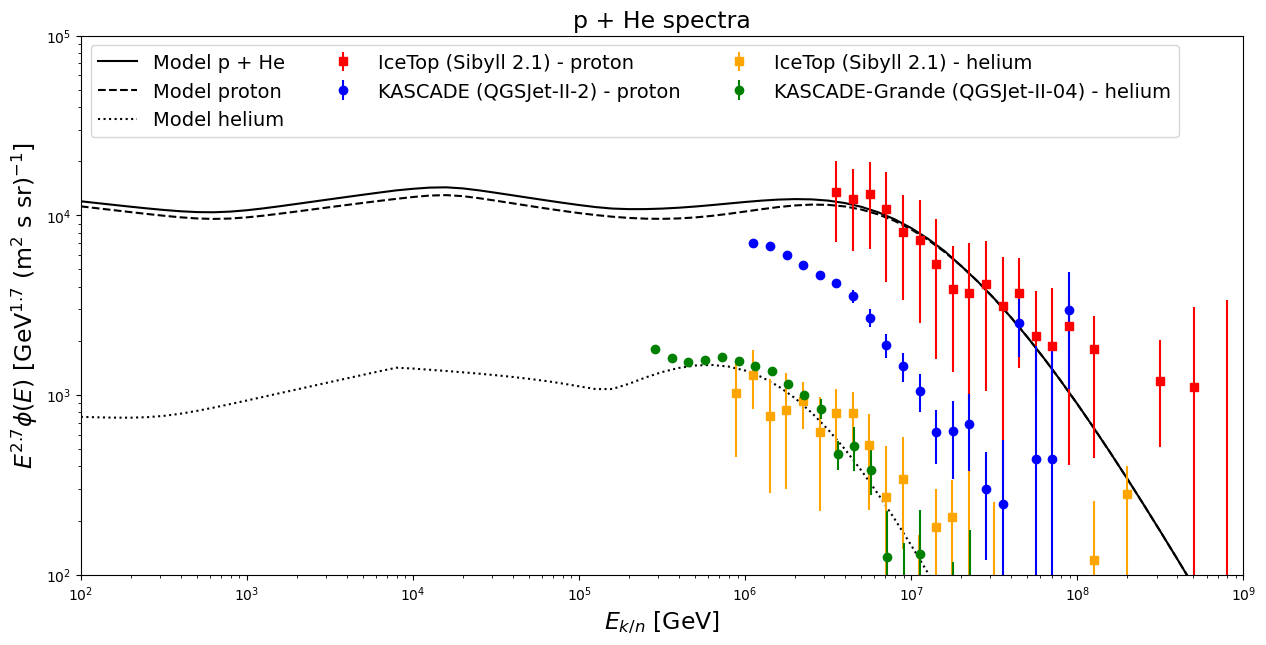

In [9]:
plt.figure(figsize=(15, 7))
# Models
plt.plot(E, phi_total_nucleon * E**2.7, color='black', label=r'Model p + He')
plt.plot(E, phi_proton_nucleon * E**2.7, '--', color='black', label=r'Model proton')
plt.plot(E, phi_He_nucleon * E**2.7, ':', color='black', label=r'Model helium')
# Data
plt.errorbar(E_ICECUBE_H, flux_ICECUBE_H * E_ICECUBE_H**2.7, yerr=(error_ICECUBE_low_H, error_ICECUBE_up_H) * E_ICECUBE_H**2.7, fmt='s', color='red', label='IceTop (Sibyll 2.1) - proton')
plt.errorbar(E_KASCADE_H, flux_KASCADE_H * E_KASCADE_H**2.7, yerr=(error_KASCADE_H_low, error_KASCADE_H_up)  * E_KASCADE_H**2.7, fmt='o', color='blue', label='KASCADE (QGSJet-II-2) - proton')
plt.errorbar(E_ICECUBE_He_nucleon, flux_ICECUBE_He_nucleon * E_ICECUBE_He_nucleon**2.7, yerr=(error_ICECUBE_low_He_nucleon, error_ICECUBE_up_He_nucleon) * E_ICECUBE_He_nucleon**2.7, fmt='s', color='orange', label='IceTop (Sibyll 2.1) - helium')
plt.errorbar(E_KASCADE_He_nucleon, flux_KASCADE_He_nucleon * E_KASCADE_He_nucleon**2.7, yerr=(error_KASCADE_He_low_nucleon, error_KASCADE_He_up_nucleon)  * E_KASCADE_He_nucleon**2.7, fmt='o', color='green', label='KASCADE-Grande (QGSJet-II-04) - helium')
#
plt.loglog()
plt.xlim(1e2, 1e9)
plt.ylim(1e2, 1e5)
plt.xlabel(r'$E_{k/n}$ [GeV]', fontsize=17)
plt.ylabel(r'$E^{2.7}\phi(E)$ [GeV$^{1.7}$ (m$^2$ s sr)$^{-1}$]', fontsize=17)
plt.legend(ncol=3, fontsize=14, loc='upper left')
plt.title('p + He spectra', fontsize=17)
plt.savefig('Plots/comparison_p_He_model.png')